In [7]:
import math 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def f(x):
  return 3*x**2 + 5*x - 7

In [9]:
f(3.0)

35.0

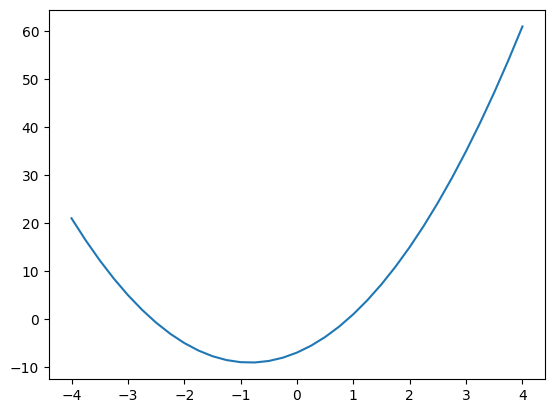

In [10]:
xs = np.arange(-4, 4.25, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [11]:
ys

array([21.    , 16.4375, 12.25  ,  8.4375,  5.    ,  1.9375, -0.75  ,
       -3.0625, -5.    , -6.5625, -7.75  , -8.5625, -9.    , -9.0625,
       -8.75  , -8.0625, -7.    , -5.5625, -3.75  , -1.5625,  1.    ,
        3.9375,  7.25  , 10.9375, 15.    , 19.4375, 24.25  , 29.4375,
       35.    , 40.9375, 47.25  , 53.9375, 61.    ])

In [12]:
h = 0.0000000001
x = -5/6
(f(x+h) - f(x))/h

0.0

In [13]:
a = 2.0
b = -3.0
c = 10
d1 = a*b + c
a += h
d2 = a*b + c
print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.9999999997
slope -3.000000248221113


In [24]:
class Value:
  def __init__(self, data, _children = (), _op=''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
  def __repr__(self):
    return f"Value(data={self.data})"
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out
  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out

In [25]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
d
(a.__mul__(b)).__add__(c)

Value(data=4.0)

In [29]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in graph, create a rectangular ('record') node for it
    dot.node(name= uid, label="{ data %.4f }" % (n.data, ), shape='record')
    if n._op:
      # if this T     

ModuleNotFoundError: No module named 'graphviz'